#### LAI
modis lai fill value = 24.9 to 25.5  
modis lai valid range = 0 to 10




In [1]:
%who

Interactive namespace is empty.


#### Plot seasonal LAI: 2017 to 2020

In [1]:
! ls figures/drought_2017to2020/

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

out_dir = 'figures/drought_2017to2020/'
figname_prefix = 'lai500m'
levels = np.linspace(0, 10, 6)

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/seas_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

for year in ['2017']:#range(2003, 2022):
    fname = data_dir + fname_prefix + str(year) + '_QC.nc'
    ds = xr.open_dataset(fname)
    ds['Lai_500m'].load()
    
    lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
    lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
    aspect = lon_size/lat_size

    # ds['Lai_500m'].plot(col = "season", col_wrap = 4, aspect = aspect, size = 3, cmap = "YlGnBu", levels = levels) #"RdBu_r")
    # plt.savefig(out_dir + figname_prefix + '_' + str(year) + '_byseas.png')

In [2]:
ds['Lai_500m']

<xarray.DataArray 'Lai_500m' (season: 4, lat: 8236, lon: 10565)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [5]:
ds['Lai_500m'].isel(season=0)

<xarray.DataArray 'Lai_500m' (lat: 8236, lon: 10565)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
    season   <U3 'DJF'

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometr

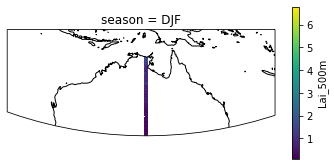

In [3]:
import cartopy.crs as ccrs

projection = ccrs.LambertConformal(central_longitude=135, central_latitude=-27)
f, ax = plt.subplots(subplot_kw=dict(projection=projection))
ds['Lai_500m'].isel(season=0).plot(transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.7))
ax.coastlines()

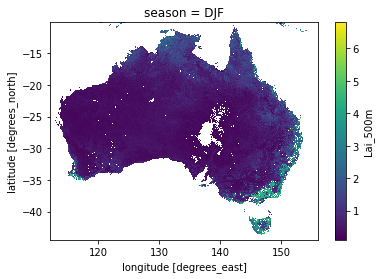

In [7]:
ds['Lai_500m'].isel(season=0).plot()

### Plot seasonal cycle in regional mean monthly LAI

In [1]:
%who

Interactive namespace is empty.


In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Regional mean over the continent

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10, 7))

out_dir = 'figures/drought_2017to2020/'
figname_prefix = 'lai500m_allRegMean'
figname = figname_prefix + '.png'

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/mon_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

colAll = 'lightgrey'
colDrght = ['gold', 'coral', 'saddlebrown']

ds_sample = xr.open_dataset(data_dir + fname_prefix + '2002_QC.nc')
weights = np.cos(np.deg2rad(ds_sample.lat))
weights.name = "weights"

other_years = list(range(2003, 2017))
other_years.extend([2020, 2021])
drght_years = [2017, 2018, 2019]

xticks = list(range(1, 13))
mon_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
title = 'LAI: Regional Mean over Australia' 

count = 0
for year in other_years:
    fname = data_dir + fname_prefix + str(year) + '_QC.nc'
    ds = xr.open_dataset(fname)
    da_regMean = ds['Lai_500m'].weighted(weights).mean(['lat', 'lon'])
    if count == 0:
        axs.plot(list(range(1, 13)), da_regMean.values, color = colAll, linewidth = 2, label = '2003-16, 2020-21')
    else:
        axs.plot(list(range(1, 13)), da_regMean.values, color = colAll, linewidth = 2)
    count = count + 1 
    
count = 0
for year in drght_years:
    fname = data_dir + fname_prefix + str(year) + '_QC.nc'
    ds = xr.open_dataset(fname)
    da_regMean = ds['Lai_500m'].weighted(weights).mean(['lat', 'lon'])
    axs.plot(list(range(1, 13)), da_regMean.values, color = colDrght[count], linewidth = 4, label = str(year))
    count = count+1

axs.set_xticks(xticks)
axs.set_xticklabels(mon_names)
axs.set_title(title)
plt.legend()
plt.savefig(out_dir + figname)

### Regional mean by vegetation classes

### Calculate and save regional mean

In [7]:
#! mkdir /g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/mon_mean/regional

In [4]:
%who

BIGGER_SIZE	 MEDIUM_SIZE	 SMALL_SIZE	 data_dir	 fname_prefix	 np	 out_dir	 pd	 plt	 
reg_file	 reg_name	 xr	 


In [16]:
data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/mon_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

out_dir = data_dir + 'regional/'

reg_name = ['tropics', 'savanna', 'warm_temperate', 'cool_temperate', 'mediterranean', 'desert']
reg_file = '/g/data/w97/ad9701/drought_2017to2020/Huthcinson_vegetation_cover_map_6_classes_modis500m.nc'
ds_reg = xr.open_dataset(reg_file)

ds_sample = xr.open_dataset(data_dir + fname_prefix + '2002_QC.nc')
weights = np.cos(np.deg2rad(ds_sample.lat))
weights.name = "weights"

for year in range(2005, 2022):
    fname = data_dir + fname_prefix + str(year) + '_QC.nc'
    ds = xr.open_dataset(fname)
    
    list_regMean = []
    for ireg in range(1, len(reg_name)+1):
        da_ireg = ds['Lai_500m'].where(ds_reg['land_cover'] == ireg).weighted(weights).mean(['lat', 'lon'])
        list_regMean.append(da_ireg)
    da_regMean = xr.concat(list_regMean, dim = 'region').assign_coords({'region': reg_name})
    out_file = out_dir + 'regMean_' + fname_prefix + str(year) + '_QC.nc'
    da_regMean.to_netcdf(out_file)

In [17]:
da_regMean

<xarray.DataArray 'Lai_500m' (region: 6, time: 12)>
array([[1.6107525 , 1.82202671, 1.91861904, 1.71298214, 1.4980707 ,
        1.29902042, 1.17081109, 1.11692984, 1.14752059, 1.17736211,
        1.26887347, 1.45475728],
       [0.95634961, 1.0794375 , 1.10835664, 0.95289761, 0.7695388 ,
        0.64707733, 0.63086339, 0.64255322, 0.63857106, 0.62197526,
        0.71490807, 0.87220332],
       [1.7153395 , 1.72956298, 1.68961273, 1.64157755, 1.2746532 ,
        1.13684187, 1.27617164, 1.6514676 , 1.9668404 , 1.99746781,
        1.71779162, 1.86540654],
       [1.87362647, 2.02492733, 1.83361445, 1.55405417, 1.48451217,
        1.40082957, 1.60809054, 1.94599557, 2.40038106, 2.66688971,
        2.46840474, 2.10668167],
       [0.48470214, 0.50774831, 0.54424901, 0.47294765, 0.54692913,
        0.8067881 , 1.18701918, 1.58964677, 1.50629411, 1.04321814,
        0.68731548, 0.56540147],
       [0.30564365, 0.33643041, 0.3497596 , 0.33973291, 0.29878089,
        0.28616685, 0.28877562, 0.30350477, 0.29975657, 0.28389652,
        0.29908057, 0.31582173]])
Coordinates:
  * time     (time) datetime64[ns] 2021-01-31 2021-02-28 ... 2021-12-31
  * region   (region) <U14 'tropics' 'savanna' ... 'mediterranean' 'desert'

In [19]:
! ls -l /g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/mon_mean/regional/

total 228
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:22 regMean_MCD15A2H.006_500m_aid0001_2003_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:27 regMean_MCD15A2H.006_500m_aid0001_2004_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:39 regMean_MCD15A2H.006_500m_aid0001_2005_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:41 regMean_MCD15A2H.006_500m_aid0001_2006_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:42 regMean_MCD15A2H.006_500m_aid0001_2007_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:44 regMean_MCD15A2H.006_500m_aid0001_2008_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:45 regMean_MCD15A2H.006_500m_aid0001_2009_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:47 regMean_MCD15A2H.006_500m_aid0001_2010_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:48 regMean_MCD15A2H.006_500m_aid0001_2011_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:50 regMean_MCD15A2H.006_500m_aid0001_2012_QC.nc
-rw-r--r--. 1 ad9701 w97 8360 Feb 23 17:51 regMean_MCD15A2H.006_500m_aid0001_2013_QC.nc
-rw-r--r--. 1 ad9701 w

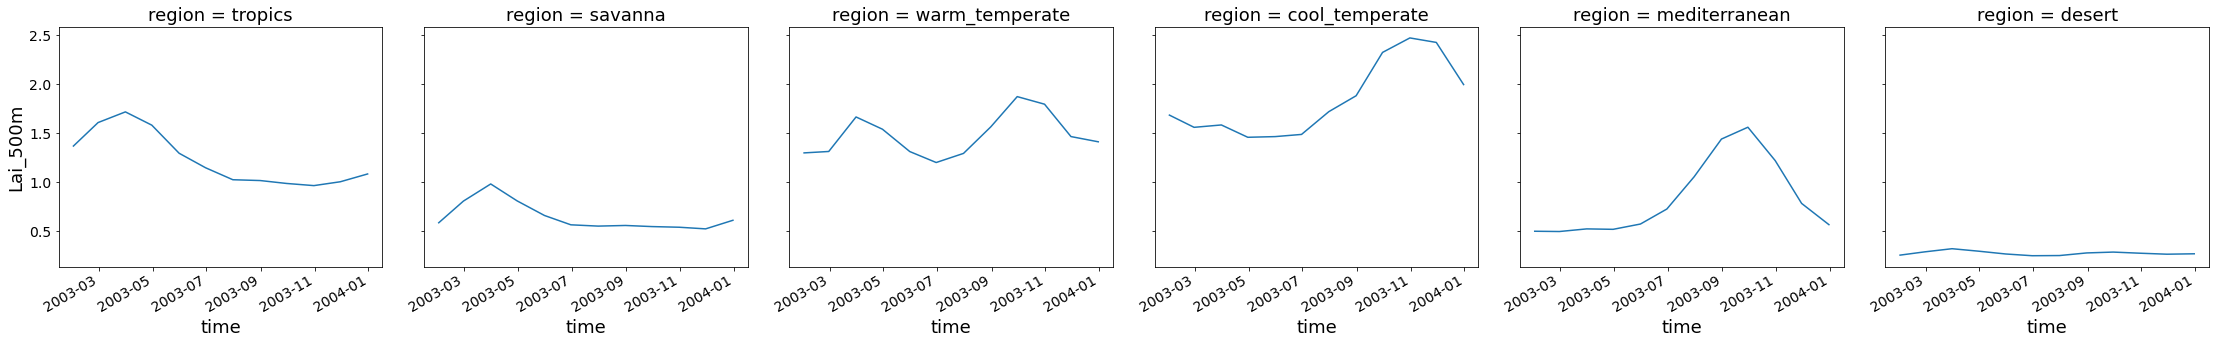

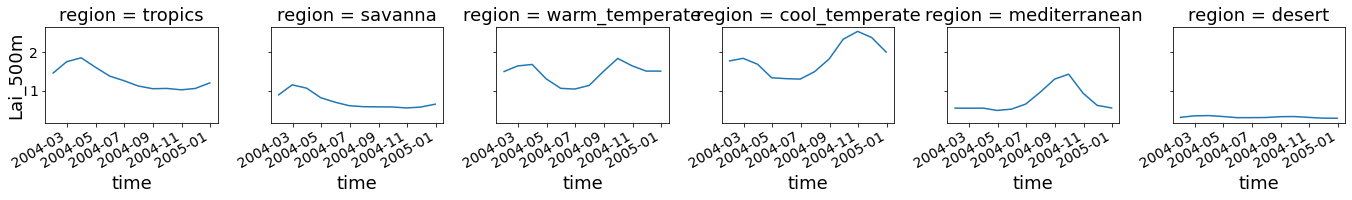

In [26]:
ds_lai = xr.open_mfdataset(data_dir + 'regional/regMean*.nc')
ds_lai['Lai_500m'].sel(time = '2003').plot(col = 'region', size = 5)
ds_lai['Lai_500m'].sel(time = '2004').plot(col = 'region')

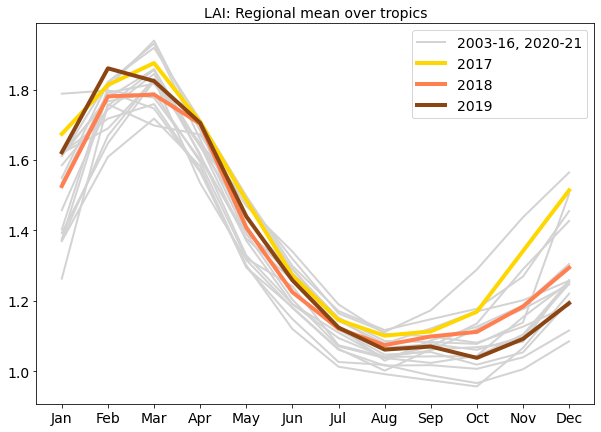

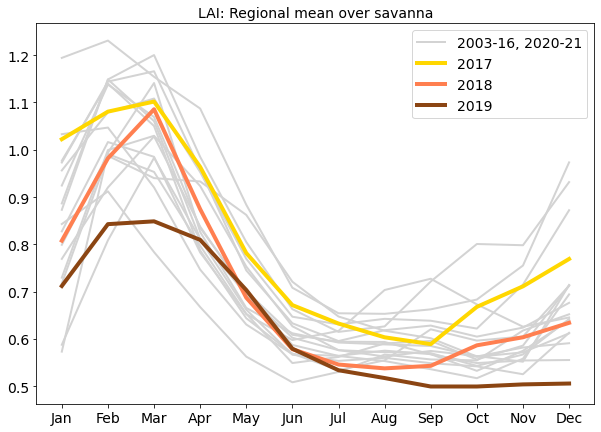

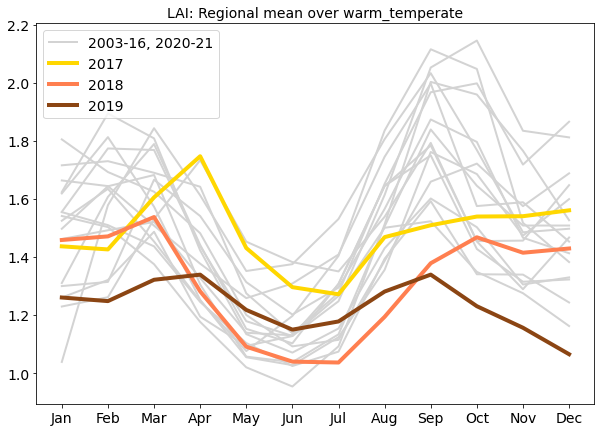

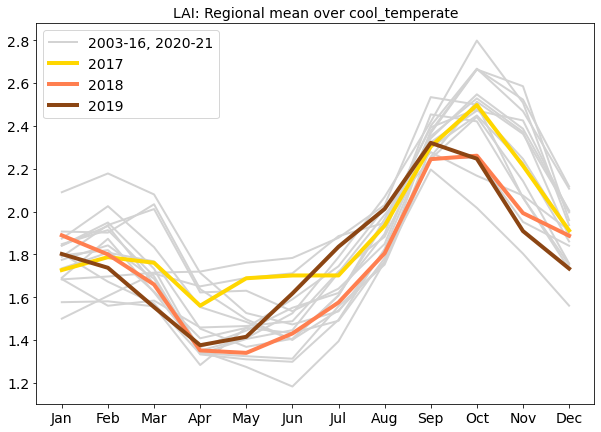

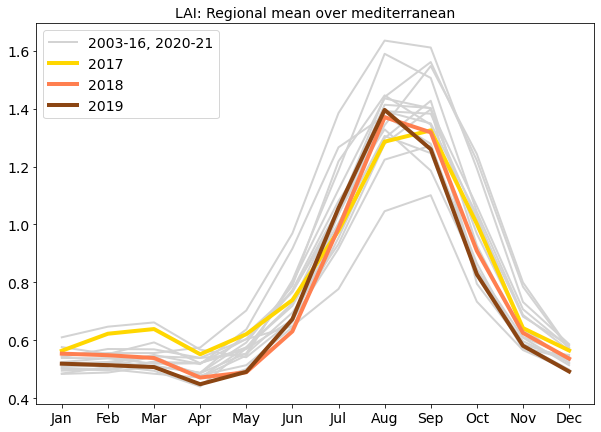

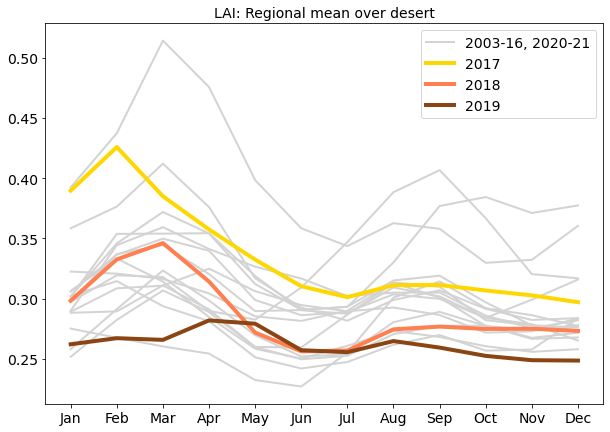

In [28]:
out_dir = 'figures/drought_2017to2020/'
figname_prefix = 'lai500m_'

colAll = 'lightgrey'
colDrght = ['gold', 'coral', 'saddlebrown']

other_years = list(range(2003, 2017))
other_years.extend([2020, 2021])
drght_years = [2017, 2018, 2019]

xticks = list(range(1, 13))
mon_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# ireg corresponds to the land_cover flag in the ds_reg file
for ireg in range(len(reg_name)):
    fig, axs = plt.subplots(1,1, figsize=(10, 7))
    figname = figname_prefix + reg_name[ireg] + '.png'
    title = 'LAI: Regional mean over ' + reg_name[ireg] 

    count = 0
    for year in other_years:
        da_regMean = ds_lai['Lai_500m'].sel(region = reg_name[ireg], time = str(year))
        if count == 0:
            axs.plot(list(range(1, 13)), da_regMean.values, color = colAll, linewidth = 2, label = '2003-16, 2020-21')
        else:
            axs.plot(list(range(1, 13)), da_regMean.values, color = colAll, linewidth = 2)
        count = count + 1 

    count = 0
    for year in drght_years:
        da_regMean = ds_lai['Lai_500m'].sel(region = reg_name[ireg], time = str(year))
        axs.plot(list(range(1, 13)), da_regMean.values, color = colDrght[count], linewidth = 4, label = str(year))
        count = count+1

    axs.set_xticks(xticks)
    axs.set_xticklabels(mon_names)
    axs.set_title(title)
    plt.legend()
    plt.savefig(out_dir + figname)
    del da_regMean, fig, axs

#### Working with the regional file obtained from Lina
#### The 'Hutchinson..nc' file contains vegetation classes on a 0.5 degree grid. I interpolated the data to the MODIS 500m grid for use with the LAI dataset
#### Huthcinson_vegetation_cover_map_6_classes_modis500m.nc

In [3]:
# saving a sample file on the MODIS 500m grid that can be used to create the corresponding mask using cdo

import xarray as xr
fname = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/mon_mean/MCD15A2H.006_500m_aid0001_2002_QC.nc'
ds = xr.open_dataset(fname)

outfile = '/g/data/w97/ad9701/drought_2017to2020/modis_lai_samplefile.nc'
ds.isel(time = 0).to_netcdf(outfile)

In [1]:
import xarray as xr
reg_file = '/g/data/w97/ad9701/drought_2017to2020/Huthcinson_vegetation_cover_map_6_classes_modis500m.nc'
ds_reg = xr.open_dataset(reg_file)

In [44]:
import numpy as np
levels = np.linspace(0.5, 6.5, 7)
levels

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

In [21]:
ds_reg

<xarray.Dataset>
Dimensions:     (Lon: 84, Lat: 68)
Coordinates:
  * Lon         (Lon) float32 112.2 112.8 113.2 113.8 ... 152.8 153.2 153.8
  * Lat         (Lat) float32 -43.75 -43.25 -42.75 ... -11.25 -10.75 -10.25
Data variables:
    land_cover  (Lat, Lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.8.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Apr 06 15:44:54 2020: cdo -L -remapnn,coarse.txt -inver...
    created_by:   R, packages ncdf4 and raster (version 2.5-8)
    date:         2018-02-02 10:48:02
    CDO:          Climate Data Operators version 1.8.0 (http://mpimet.mpg.de/...

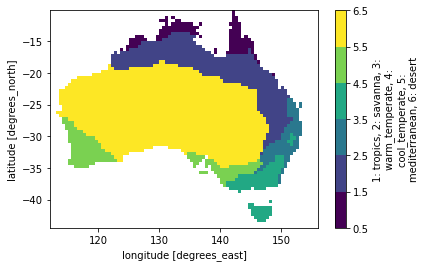

In [9]:
ds_reg['land_cover'].plot(levels=levels)

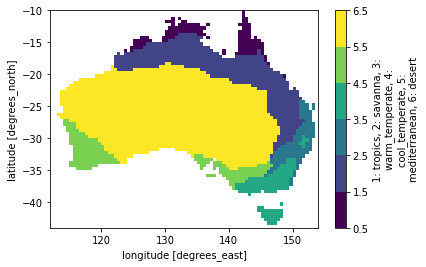

In [47]:
ds_reg['land_cover'].plot(levels=levels)

In [80]:
legend_labels = ['tropics', 'savanna', 'warm_temperate', 'cool_temperate', 'mediterranean', 'desert']
[str(x) + ':' + y for x,y in zip(range(1, 7), legend_labels)]

['1:tropics',
 '2:savanna',
 '3:warm_temperate',
 '4:cool_temperate',
 '5:mediterranean',
 '6:desert']

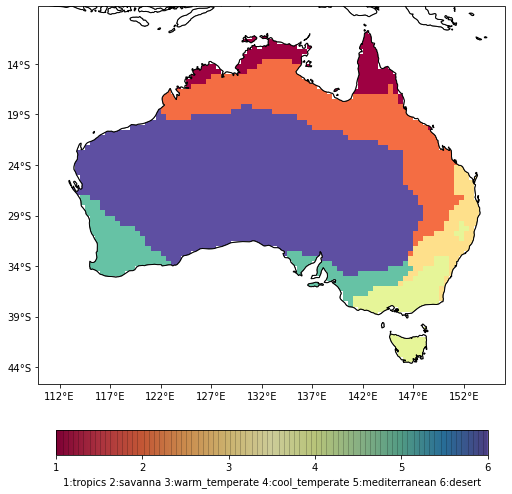

In [96]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import numpy as np
levels = np.linspace(0.5, 6.5, 7)
legend_locs = np.linspace(1,6,6)
legend_labels = ['tropics', 'savanna', 'warm_temperate', 'cool_temperate', 'mediterranean', 'desert']
label =  ' '.join([str(x) + ':' + y for x,y in zip(range(1, 7), legend_labels)])
cmapSel = 'Spectral'

ds = ds_reg
xticks = np.arange(np.floor(ds.Lon.min().values),np.ceil(ds.Lon.max().values),5)  #lon
yticks = np.arange(np.floor(ds.Lat.min().values),np.ceil(ds.Lat.max().values),5)   #lat

fig, axs = plt.subplots(1,1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,7)) #width, height
# cs=axs.contourf(ds_reg['Lon'],ds_reg['Lat'],ds_reg['land_cover'],levels,
#                       transform = ccrs.PlateCarree(),
#                       cmap=cmapSel) #,extend='both')   #cmap options: coolwarm,
cs=axs.pcolormesh(ds_reg['Lon'],ds_reg['Lat'],ds_reg['land_cover'],#,levels,
                      transform = ccrs.PlateCarree(),
                      cmap=cmapSel) #,extend='both')   #cmap options: coolwarm,


#cbar = plt.colorbar(cs, ax=axs, orientation='horizontal')

# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.OCEAN, zorder=2, edgecolor='k', facecolor='w')

# Longitude labels
axs.set_xticks(xticks, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
#axs.set_xlim(xlim)

# Latitude labels
axs.set_yticks(yticks, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
#axs.set_ylim(ylim)

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.95, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.08)
# fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
#                     wspace=0.1, hspace=0.1)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.06, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', ticks=legend_locs, drawedges=True, label=label)

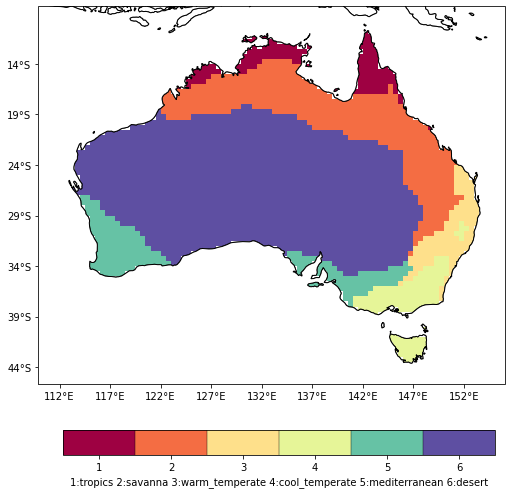

In [120]:
fig, axs = plt.subplots(1,1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,7))
fig.subplots_adjust(bottom=0.2, top=0.95, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.08)
cbar_ax = fig.add_axes([0.21, 0.06, 0.6, 0.05])
cs = ds_reg['land_cover'].plot(levels=levels, ax = axs, add_colorbar=False, cmap='Spectral')
plt.colorbar(cs, cax=cbar_ax,orientation='horizontal', ticks=legend_locs, drawedges=True, label=label)
axs.coastlines()
axs.add_feature(cfeature.OCEAN, zorder=2, edgecolor='k', facecolor='w')

# Longitude labels
axs.set_xticks(xticks, crs=ccrs.PlateCarree())
axs.set_xlabel('')
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
#axs.set_xlim(xlim)

# Latitude labels
axs.set_yticks(yticks, crs=ccrs.PlateCarree())
axs.set_ylabel('')
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

plt.savefig('figures/drought_2017to2020/vegetation_classes_coarse.png')

In [118]:
axs.set_xlabel

<bound method _AxesBase.set_xlabel of <GeoAxesSubplot:xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>>

In [89]:
np.unique(ds_reg['land_cover'].sel(Lon = 132.25).values)

array([ 1.,  2.,  6., nan], dtype=float32)

In [41]:
#np.floor(ds.Lon.min().values)
np.ceil(ds.Lon.min().values)

113.0

In [6]:
import xarray as xr
reg_file = '/g/data/w97/ad9701/drought_2017to2020/Huthcinson_vegetation_cover_map_6_classes_coarse.nc'
ds_reg = xr.open_dataset(reg_file)
ds_reg

<xarray.Dataset>
Dimensions:     (Lon: 84, Lat: 68)
Coordinates:
  * Lon         (Lon) float32 112.2 112.8 113.2 113.8 ... 152.8 153.2 153.8
  * Lat         (Lat) float32 -43.75 -43.25 -42.75 ... -11.25 -10.75 -10.25
Data variables:
    land_cover  (Lat, Lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Apr 06 15:44:54 2020: cdo -L -remapnn,coarse.txt -inver...
    created_by:   R, packages ncdf4 and raster (version 2.5-8)
    date:         2018-02-02 10:48:02
    CDO:          Climate Data Operators version 1.8.0 (http://mpimet.mpg.de/...

NameError: name 'np' is not defined

In [93]:
import matplotlib
import numpy as np
color_locs = np.linspace(0, 1, 6)
cmap = matplotlib.cm.get_cmap('Spectral')
colors = cmap(color_locs)
colors
# print(rgba)

#ds_reg['land_cover'].plot(levels=8) #, cmap="husl")

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.95686275, 0.42745098, 0.2627451 , 1.        ],
       [0.99607843, 0.87843137, 0.54509804, 1.        ],
       [0.90196078, 0.96078431, 0.59607843, 1.        ],
       [0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [ ]:
%who

In [7]:
other_years

In [10]:
axs.set_xticklabels

<bound method _AxesBase.set_xticklabels of <AxesSubplot:>>

### Scratch Space

In [75]:
import numpy as np
import xarray as xr
import climtas
import os
import datetime
import itertools

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

for year in [2003]: #range(2002, 2022):
    fname =  fname_prefix + str(year) + '_QC.nc'
    ds_lai = xr.open_mfdataset(data_dir + fname, chunks = {'time': 1})#chunks = {'lat':800, 'lon':1000})
    ds_lai

In [27]:
np.unique(np.diff(ds_lai['Lai_500m'].lon))

array([0.00416667, 0.00416667, 0.00416667, 0.00416667])

In [28]:
lat_sel = slice(-32, -39)
lon_sel = slice(139, 152)
da_lai_mean = ds_lai['Lai_500m'].sel(lat = lat_sel, lon = lon_sel).mean(['lat', 'lon'])

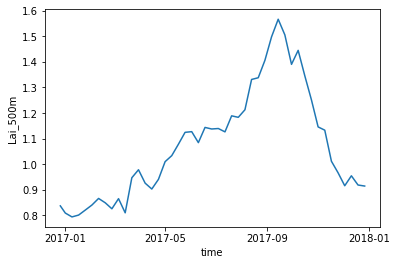

In [30]:
da_lai_mean.plot()

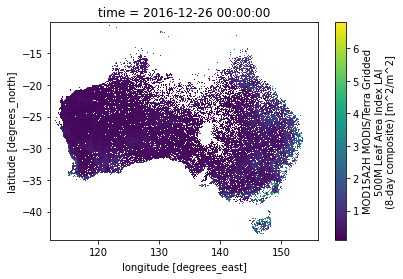

In [19]:
ds_lai['Lai_500m'][0,:,:].plot()#.nbytes/10**9

### Calculate monthly LAI

In [1]:
%who

Interactive namespace is empty.


In [5]:
import numpy as np
import xarray as xr
import pandas as pd

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/'
out_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/mon_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

for year in range(2002, 2022):
    print('Working on year' + str(year))
    fname =  fname_prefix + str(year) + '_QC.nc'
    ds_lai = xr.open_mfdataset(data_dir + fname, chunks = {'time': 1})#chunks = {'lat':800, 'lon':1000})
    da_temp = ds_lai.sel(time = slice(str(year), None)).groupby('time.month').mean('time')
    
    if year == 2002:
        time_index = pd.date_range(str(year) + "-07", freq="M", periods=6)
    else:
        time_index = pd.date_range(str(year) + "-01", freq="M", periods=12)
    da_temp = da_temp.rename({'month':'time'}).assign_coords({'time':time_index})
    
    out_file_path = out_dir + fname
    da_temp.to_netcdf(out_file_path)

Working on year2002
Working on year2003
Working on year2004
Working on year2005
Working on year2006
Working on year2007
Working on year2008
Working on year2009
Working on year2010
Working on year2011
Working on year2012
Working on year2013
Working on year2014
Working on year2015
Working on year2016
Working on year2017
Working on year2018
Working on year2019
Working on year2020
Working on year2021


### Calculate seasonal LAI

In [3]:
%who

da_temp	 data_dir	 ds_lai	 fname_prefix	 fnames	 np	 out_dir	 out_file_path	 pd	 
xr	 year	 


In [2]:
import numpy as np
import xarray as xr
import pandas as pd

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/'
out_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/seas_mean/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

for year in range(2003, 2022):
    print('Working on year' + str(year))
    fnames =  [data_dir + fname_prefix + str(year-1) + '_QC.nc', data_dir + fname_prefix + str(year) + '_QC.nc']
    ds_lai = xr.open_mfdataset(fnames, chunks = {'time': 1})#chunks = {'lat':800, 'lon':1000})
    da_temp = ds_lai.sel(time = slice(str(year-1)+ "-12", str(year)+ "-11")).groupby('time.season').mean('time')
    
    # time_index = pd.date_range(str(year) + "-01", freq="3MS", periods=4). The season are in order DJF, JJA, MAM, SON - so can't assign this directly.
    
    out_file_path = out_dir + fname_prefix + str(year) + '_QC.nc'
    da_temp.to_netcdf(out_file_path)

Working on year2003
Working on year2004
Working on year2005
Working on year2006
Working on year2007
Working on year2008
Working on year2009
Working on year2010
Working on year2011
Working on year2012
Working on year2013
Working on year2014
Working on year2015
Working on year2016
Working on year2017
Working on year2018
Working on year2019
Working on year2020
Working on year2021


#### Used the quality flags to subset and saved the data by submitting a job on Gadi

In [2]:
import numpy as np
import xarray as xr
import climtas
import os
import datetime
import itertools

data_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/'
out_dir = '/g/data/w97/ad9701/MODIS/MCD15A2H.006/after_QC/'
fname_prefix = 'MCD15A2H.006_500m_aid0001_'

for year in range(2003, 2022):
    fname =  fname_prefix + str(year) + '.nc'
    ds_lai = xr.open_dataset(data_dir + fname)
    ds_lai['FparLai_QC'].load()
    ds_lai['Lai_500m'].load()
    da_lai_fnl = ds_lai['Lai_500m'].where(ds_lai['Lai_500m']<24.9).where(ds_lai['FparLai_QC'] <= 2)
    
    out_file = out_dir + fname_prefix + str(year) + '_QC.nc'
    da_lai_fnl.to_netcdf(out_file)
    del ds_lai, da_lai_fnl, out_file

MemoryError: Unable to allocate 15.2 GiB for an array with shape (47, 8236, 10565) and data type float32

In [3]:
da_lai_temp.to_netcdf(out_file)

In [6]:
ds_lai['FparLai_QC'].load() #nbytes/10**9

<xarray.DataArray 'FparLai_QC' (time: 23, lat: 8236, lon: 10565)>
array([[[157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        ...,
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.]],

       [[157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        ...,
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.]],

       [[157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        ...,
...
        ...,
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.]],

       [[157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        ...,
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.]],

       [[157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        [157., 157., 157., ..., 157., 157., 157.],
        ...,
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.],
        [ nan,  nan,  nan, ..., 157., 157., 157.]]], dtype=float32)
Coordinates:
  * time     (time) object 2002-07-04 00:00:00 ... 2002-12-27 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:    crs
    valid_min:       0
    valid_max:       254
    long_name:       MOD15A2H MODIS/Terra+Aqua QC for FPAR and LAI (8-day com...
    units:           class-flag
    FparLai_QC_DOC:  \nFparLai_QC 5 BITFIELDS IN 8 BITWORD\nMODLAND_QC START ...

In [4]:
ds_lai['Lai_500m'].load()

<xarray.DataArray 'Lai_500m' (time: 23, lat: 8236, lon: 10565)>
array([[[25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        ...,
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4]],

       [[25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        ...,
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4]],

       [[25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        ...,
...
        ...,
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4]],

       [[25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        ...,
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4]],

       [[25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
        ...,
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
        [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4]]], dtype=float32)
Coordinates:
  * time     (time) object 2002-07-04 00:00:00 ... 2002-12-27 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:           crs
    valid_min:              0
    valid_max:              100
    scale_factor_err:       0.0
    add_offset_err:         0.0
    calibrated_nt:          21
    long_name:              MOD15A2H MODIS/Terra Gridded 500M Leaf Area Index...
    units:                  m^2/m^2
    MOD15A2_FILLVALUE_DOC:  MOD15A2 FILL VALUE LEGEND\n255 = _Fillvalue, assi...

In [ ]:
ds_lai['FparLai_QC'].load()

### Scratch Space

In [ ]:
da_lai_fnl

In [5]:
# save the final data after applying the QC flag

# exclude other land covers
# & subset by quality flag
da_lai_fnl = ds_lai['Lai_500m'].where(ds_lai['Lai_500m']<24.9).where(ds_lai['FparLai_QC'] <= 2)
da_lai_fnl

<xarray.DataArray 'Lai_500m' (time: 23, lat: 8236, lon: 10565)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 2002-07-04 00:00:00 ... 2002-12-27 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:           crs
    valid_min:              0
    valid_max:              100
    scale_factor_err:       0.0
    add_offset_err:         0.0
    calibrated_nt:          21
    long_name:              MOD15A2H MODIS/Terra Gridded 500M Leaf Area Index...
    units:                  m^2/m^2
    MOD15A2_FILLVALUE_DOC:  MOD15A2 FILL VALUE LEGEND\n255 = _Fillvalue, assi...

In [6]:
fname_out = 'lai_' + fname + '_after_QC.nc'
da_lai_fnl.to_netcdf(modis_dir + fname_out)

In [ ]:
da_lai_fnl.groupby('time.month').mean().plot(col='month')

In [3]:
da_temp = ds_lai['Lai_500m'][0,:,:].load()

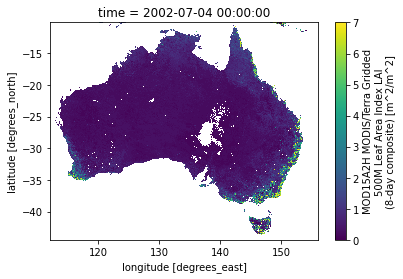

In [4]:
da_temp.where(da_temp < 25).plot()

In [5]:
da_temp

<xarray.DataArray 'Lai_500m' (lat: 8236, lon: 10565)>
array([[25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
       [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
       [25.4, 25.4, 25.4, ..., 25.4, 25.4, 25.4],
       ...,
       [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
       [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4],
       [ nan,  nan,  nan, ..., 25.4, 25.4, 25.4]], dtype=float32)
Coordinates:
    time     object 2002-07-04 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:           crs
    valid_min:              0
    valid_max:              100
    scale_factor_err:       0.0
    add_offset_err:         0.0
    calibrated_nt:          21
    long_name:              MOD15A2H MODIS/Terra Gridded 500M Leaf Area Index...
    units:                  m^2/m^2
    MOD15A2_FILLVALUE_DOC:  MOD15A2 FILL VALUE LEGEND\n255 = _Fillvalue, assi...

In [5]:
da_temp_QC = ds_lai['FparLai_QC'][0,:,:].load()

In [5]:
ds_lai['FparLai_QC']

<xarray.DataArray 'FparLai_QC' (time: 23, lat: 8236, lon: 10565)>
[2001306820 values with dtype=float32]
Coordinates:
  * time     (time) object 2002-07-04 00:00:00 ... 2002-12-27 00:00:00
  * lat      (lat) float64 -10.13 -10.13 -10.14 -10.14 ... -44.43 -44.44 -44.44
  * lon      (lon) float64 112.1 112.1 112.1 112.1 ... 156.1 156.1 156.1 156.1
Attributes:
    grid_mapping:    crs
    valid_min:       0
    valid_max:       254
    long_name:       MOD15A2H MODIS/Terra+Aqua QC for FPAR and LAI (8-day com...
    units:           class-flag
    FparLai_QC_DOC:  \nFparLai_QC 5 BITFIELDS IN 8 BITWORD\nMODLAND_QC START ...

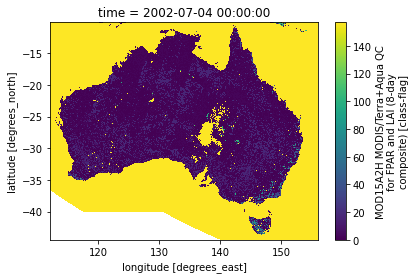

In [5]:
da_temp_QC.plot()

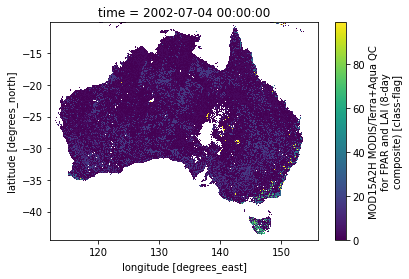

In [6]:
da_temp_QC.where(da_temp_QC<=100).plot()

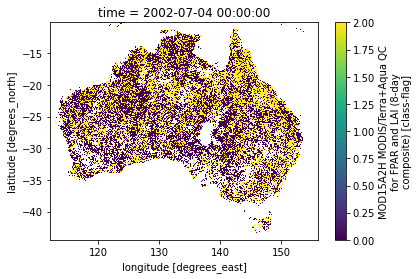

In [4]:
da_temp_QC.where(da_temp_QC<=2).plot()

In [10]:
import pandas as pd
np.unique(da_temp_QC.values.flatten())

array([  0.,   2.,   8.,  10.,  16.,  18.,  32.,  34.,  40.,  42.,  48.,
        50.,  65.,  67.,  73.,  75.,  81.,  83.,  97.,  99., 105., 107.,
       113., 115., 157.,  nan], dtype=float32)

157., - bad
0.,  - good 
2.,  - good
18.,  - mixed cloud
34.,  
16.,  - mixed cloud
48.,  
32., 
113.,  
99.,   
8.,
42.,
97.,
10.,
50.,
107.,
105.,
115.,
40.,
81.,
73.,
65.,
75.,
83.,
nan,
67.